In [173]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost as xgb
import math
import csv
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [174]:
train_a = pd.read_parquet('../../A/train_targets.parquet')
train_b = pd.read_parquet('../../B/train_targets.parquet')
train_c = pd.read_parquet('../../C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('../../A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../../B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../../C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../../A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../../B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../../C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('../../A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../../B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../../C/X_test_estimated.parquet')

MAKE an isrime feature

Fix precip_5min:mm A

Visibilty x dew x rime ?

In [175]:
X_train_observed_a.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [176]:
def find_repeated_rows(df, column):
    '''
    Returns all indicies (from, to) which have the largest intervals of being constant. The output is sorted from 
    largest to smallest.
    '''
    df = df.reset_index()
    repeated_temp = []
    intervals = []

    first = True

    for index, row in df.iterrows():
        if index == 0:
            continue
        if row[column] == df.iloc[index - 1][column]:
            repeated_temp.append(index)
            if first: 
                repeated_temp.insert(0, index - 1)
                first = False
        else:
            if len(repeated_temp) > 1:
                intervals.append((repeated_temp[0], repeated_temp[-1]))
            repeated_temp = []
            first = True

    return sorted(intervals, key=lambda t: t[1] - t[0], reverse=True)


In [177]:
#intervals = find_repeated_rows(X_train_observed_b, 'precip_5min:mm')
#print("The largest interval is", intervals[0])
#print("Difference =", intervals[0][1] - intervals[0][0])

In [178]:
X_train_observed_a.set_index('date_forecast', inplace=True)
X_train_observed_b.set_index('date_forecast', inplace=True)
X_train_observed_c.set_index('date_forecast', inplace=True)


In [190]:
feat = 'air_density_2m:kgm3'
date = None
if date:
    date = ('2021-05-01 00:00', '2021-05-08 00:00')
else: 
    date = (None, None)

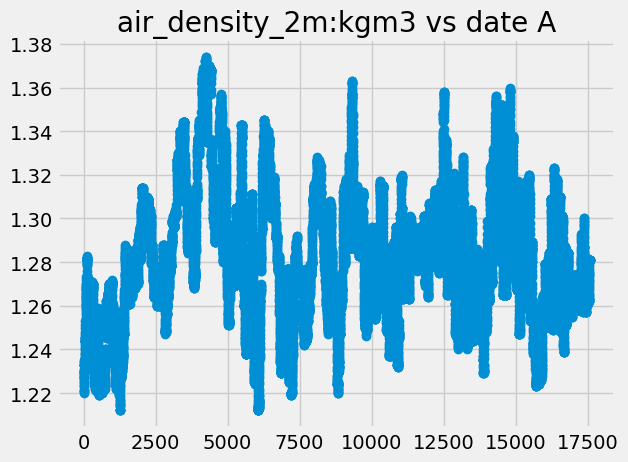

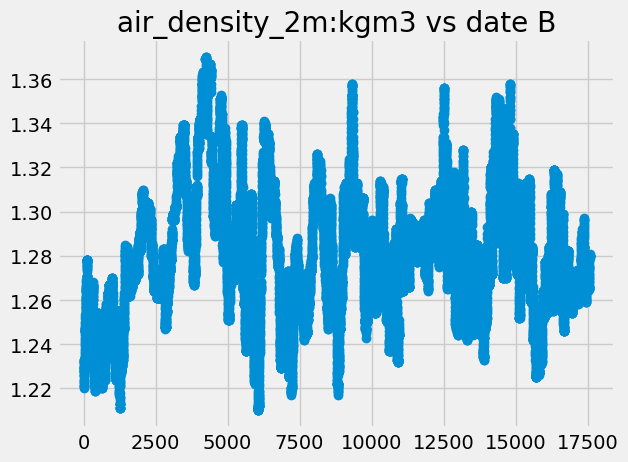

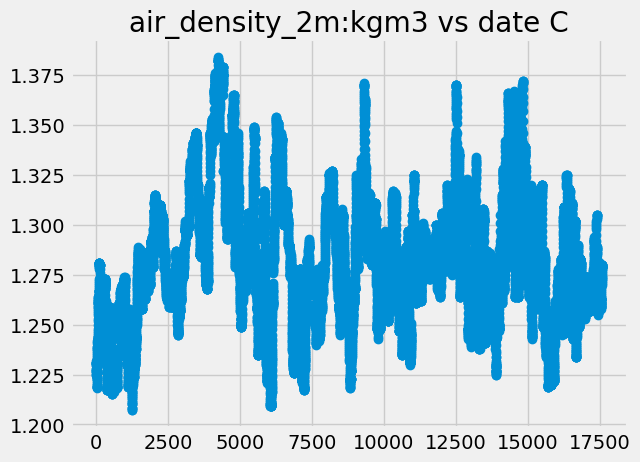

In [191]:
X_train_estimated_a[feat].plot(style='o', xlim=date)
plt.title(feat + " vs date A")
plt.show()
X_train_estimated_b[feat].plot(style='o', xlim=date)
plt.title(feat + " vs date B")
plt.show()
X_train_estimated_c[feat].plot(style='o',xlim =date)
plt.title(feat + " vs date C")
plt.show()

<Axes: xlabel='date_forecast'>

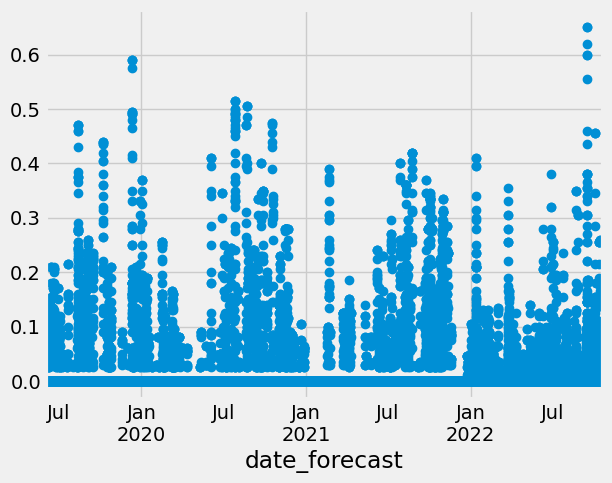

In [181]:
X_train_observed_a['precip_5min:mm'] = X_train_observed_a['precip_5min:mm'] .rolling(window=6).median()
X_train_observed_a['precip_5min:mm'].plot(style='o')

In [182]:
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

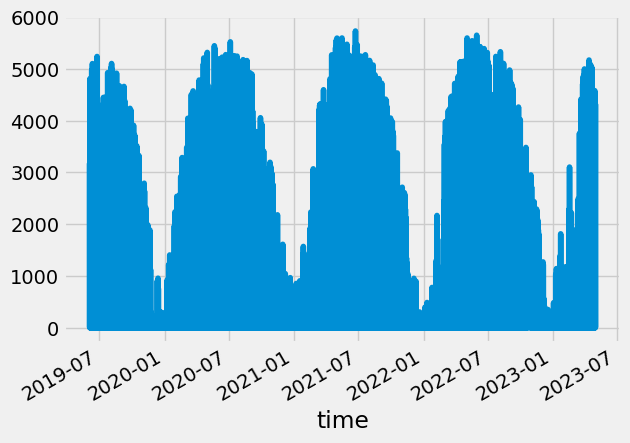

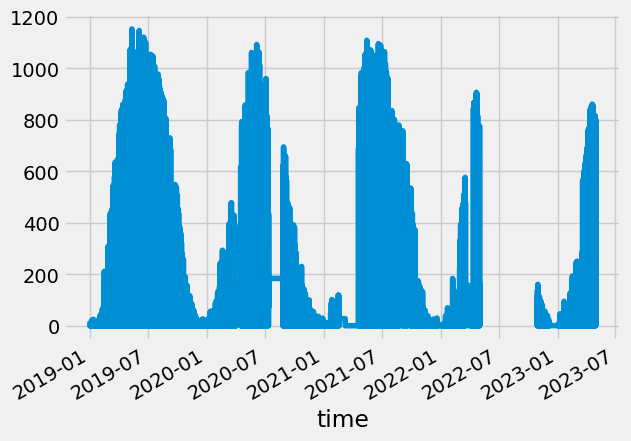

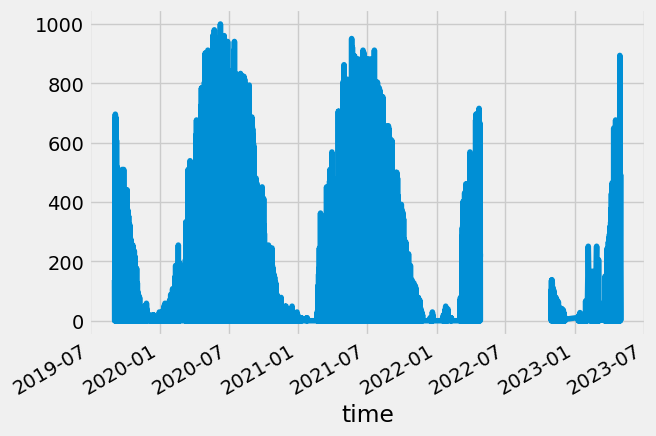

In [183]:
train_a['pv_measurement'].plot()
plt.show()
train_b['pv_measurement'].plot()
plt.show()
train_c['pv_measurement'].plot()
plt.show()

In [186]:
train_b['pv_measurement'] = train_b['pv_measurement'].rolling(window=100).median()

<Axes: xlabel='time'>

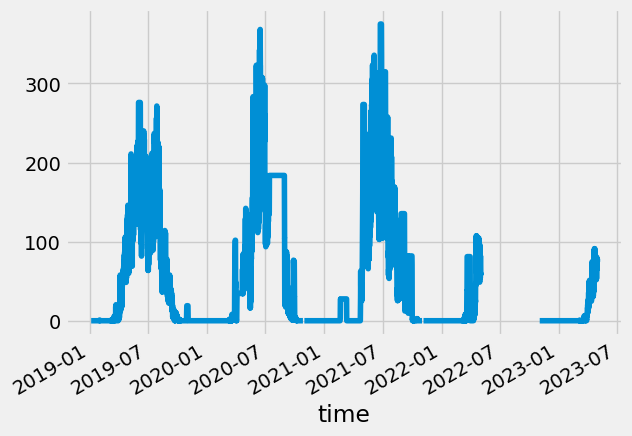

In [187]:
train_b['pv_measurement'].plot()